## Analyzing IMDB 5000 movies dataset to find :
### #Top 25 movies based on IMBD scores!
### #Top movies by genres IMDB score.
### #Top Directors and Actors
### #Return on Investment for Top Directors and Actors 
### #Top Hindi movies based on IMDB score
### #Top rated movies based on Facebook likes!
### #Top movie based on gross.
### # Average IMDB rating by year
### # Average score change for each cantent rating. 

In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import pandas as pd

import json

import os

from matplotlib.pyplot import *


import json

In [3]:

movie_df =  pd.read_csv("/Users/VGPersonal/Documents/Aj-Projects/IMDB Analysis/movie_metadata.csv")



In [4]:
movie_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [6]:
movie_df.columns


Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [7]:
#Checking Null values

movie_df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

#### #Class to perform basic analysis

In [40]:

class Movie_analysis(object):
#''' it contains methods for analysis for movie dataset :  
# ''' it contains plotting null values, finding top rated by column names, plotting bar and scatter plots, mean and sum groupby ''
    
    def __init__(self, df):
        self.df = df
        
    def null_plot(self):
#plots bar graph for all the null values in a dataframe
        null = self.df.isnull().sum().plot(kind = 'bar',figsize = (10,5))
        return null
    
######################---Top---###################################
        
    def top_rated(self, col1, col2,clo3, col4):
 # function that takes 4 column names, groups by maximum of col1 w.r.t(displays) col2,3,4 and sorts by col2       
        mr = self.df.groupby(col1)[col2, clo3,col4].max().sort_values(by = col2, ascending = False)
        return mr
    
#     def top_n(self, col1, col2,col3,col4, n):
# # Top n (n = natural number) for any two columns within any df along with dataframe df.
#     #Finds top n of two columns!
# #where col1 = displayed w.r.t col2's nlargest values
#         topn = self.df.nlargest(n, col2)[[col1,col2,col3,col4]].reset_index()
#         return topn 
    
    def top_n(self, col1, col2,col3,col4, n):
    #to find Top n of any two columns(col1, col2), in a Dataframe(df).
        tn = self.df.nlargest(n, col2)[[col1,col2,col3,col4]].reset_index(drop=True)
        return tn
    
    def top_10(self, col1, col2):
    #to find Top 10 of any two columns(col1, col2), in a Dataframe(df).
        t10 = self.df.nlargest(10, col2)[[col1,col2]].reset_index(drop=True)
        return t10
    
    
    def top_rated_year(self,col1,col2,col3,year):
        myr = self.df.groupby(col1).max().loc[year][[col2,col3]]
        return myr
    
    def last_n(self, col1,col2,col3,n):
        ln = self.df.groupby(col1)[col2,col3].max().tail(n)
        return ln
    
    
  
    
    
    def top_25(self, col1,col2):
    ## Need to be improved
    #group by col1 with summation of col2 and naming the col2 with col2name
        smm = self.df[col2].groupby(self.df[col1]).sum().head(25)
        smm = smm.to_frame(name= col2)
        sn = smm.sort_values(col2, ascending = False)
        return smm,sn
    
########################--Least--###############################################
  
    def least_n(self, col1, col2,col3,col4, n):
    #to find Least n of any two columns(col1, col2), in a Dataframe(df)  but view by 4 columns.
        ln = self.df.nsmallest(n, col2)[[col1,col2,col3,col4]].reset_index(drop=True)
        return ln
    
    def least_rated_year(self,col1,col2,col3,year):
        lyr = self.df.groupby(col1).min().loc[year][[col2,col3]]
        return lyr


    
    
##############---Sum & Mean Groupby---##########################################   
    def mean_groupby(self, col1, col2, col3):
    #groupping colomns with mean aggregation. 
        agrp = self.df.groupby(col1)[col2,col3 ].agg('mean')
        return agrp 
    
    
    def sum_groupby(self, col1, col2, col3):
#gropping colomns with sum aggregation. 
# Function to Groupby by one colomn w.r.t two other colomns. 
        grp = self.df.groupby(col1)[col2,col3 ].agg('sum')
        return grp
    
    
################################Return on Investment #############################
    
    def roi(self,col1,col2,col3,n):
#calculatin Return on Investment(ROI) for one Parameter = col1, 
# profit = col2
# investment = col3
        profit = self.df.groupby(col1)[col2 ].agg('sum')
        invest = self.df.groupby(col1)[col3].agg('sum')
        ri = profit/invest
        gi = ri.sort_values(ascending = False).head(n)
        return gi
    
    def roiy(self,col1,col2,col3,n,yearv,y):
#calculatin Return on Investment(ROI) for one Parameter = col1, 
# profit = col2
# investment = col3
#n = number of values to be displayed
# yearv = to give a column name for year based analysis(name of the year column)
# y = year(to get all the values greater than year y )
        v = self.df[self.df[yearv]>= y]
        profit = v.groupby(col1)[col2 ].agg('sum')
        invest = v.groupby(col1)[col3].agg('sum')
        ri = profit/invest
        gi = ri.sort_values(ascending = False).head(n)
        return gi
    
#####################---Graphs----##################### 
    def barplot_col(self, col1, col2,labelx,labely):
 # Function to plot a Red Bar plot with two colomns in a given Dataframe(df).
    #to plot a dataframes' Bar graph, colums and their labels 
        bplot = self.df.plot(kind='bar',x=col1 ,y=col2, figsize=(18,9), color='darkblue')
        xl =plt.xlabel(labelx)
        yl = plt.ylabel(labely)
        return bplot, xl,yl
    
#     def barplot(s):
#         brplt = s.plot(kind='bar', figsize=(18,9), color='green')
#         return brplt
 
   
  

In [278]:
## Graph functio not part of to any Class.
def barplot(s):
        brplt = s.plot(kind='bar', figsize=(18,9), color='rbg')
        return brplt
    
def barplot_col(df, col1, col2,labelx,labely):
 # Function to plot a Red Bar plot with two colomns in a given Dataframe(df).
    #to plot a dataframes' Bar graph, colums and their labels 
        bplot = df.plot(kind='bar',x=col1 ,y=col2, figsize=(18,9), color='rbgk')
        xl =plt.xlabel(labelx)
        yl = plt.ylabel(labely)
        return bplot, xl,yl
    
def barhplot(s):
    bhplt = s.plot(kind='barh', figsize = (18,9), color = 'gbr')
    return bhplt

def histplot(s):
    hplt = s.plot(kind='hist', figsize = (18,9), color = 'kbr')
    return hplt

def hist_col(s,col1,xlabel,ylabel,title):
    hc = s.plot(kind='hist', figsize=(12,8),bins=40, stacked=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     plt.locator_params(nbins=15)


def sctrplt(s, col1, col2,labelx, labely):
    # scatter plot for two columns.
    splt =plt.scatter(s[col1], s[col2], marker='.')
    xl =plt.xlabel(labelx)
    yl = plt.ylabel(labely)
    return splt, xl,yl

def stripplot(s,col1,col2,huecol):
    ax = sns.stripplot(x=col1, y=col2,hue = huecol,
                   data=s, jitter=True ,size= 6, marker= "p" ,linewidth=1,split=True)
    


In [42]:
movie = Movie_analysis(movie_df)

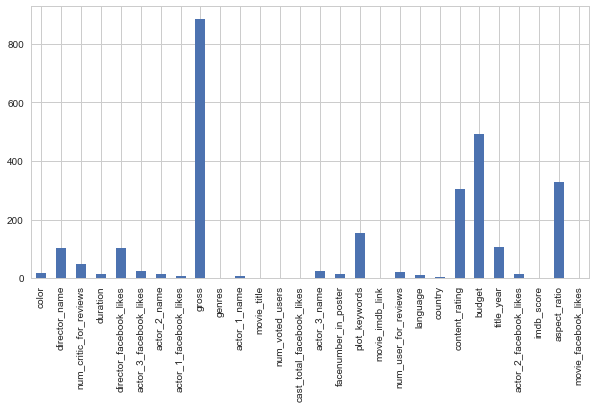

In [43]:
#grapphing null values
movie.null_plot()

#### ## Dropping all the null values from the dataset. 
#### ## To analyse without any NAN values use namovie

In [11]:

na = movie_df.dropna()

In [12]:
namovie = Movie_analysis(na)

In [22]:
nml =  namovie.least_n( "movie_title", "imdb_score","title_year","director_name" ,25)
nml

,movie_title,imdb_score,title_year,director_name
0,Justin Bieber: Never Say Never,1.6,2011.0,Jon M. Chu
1,Disaster Movie,1.9,2008.0,Jason Friedberg
2,Superbabies: Baby Geniuses 2,1.9,2004.0,Bob Clark
3,Who's Your Caddy?,2.0,2007.0,Don Michael Paul
4,From Justin to Kelly,2.1,2003.0,Robert Iscove
5,Glitter,2.1,2001.0,Vondie Curtis-Hall
6,Crossover,2.1,2006.0,Preston A. Whitmore II
7,Son of the Mask,2.2,2005.0,Lawrence Guterman
8,Epic Movie,2.3,2007.0,Jason Friedberg
9,Alone in the Dark,2.3,2005.0,Uwe Boll


In [16]:
# Finding top25 movie titles based on imdb score

top25_imdb = movie.top_n( "movie_title", "imdb_score","title_year","director_name" ,25)

top25_imdb

,movie_title,imdb_score,title_year,director_name
0,Towering Inferno,9.5,NaN,John Blanchard
1,The Shawshank Redemption,9.3,1994.0,Frank Darabont
2,The Godfather,9.2,1972.0,Francis Ford Coppola
3,Dekalog,9.1,NaN,NaN
4,Dekalog,9.1,NaN,NaN
5,Kickboxer: Vengeance,9.1,2016.0,John Stockwell
6,The Dark Knight,9.0,2008.0,Christopher Nolan
7,The Godfather: Part II,9.0,1974.0,Francis Ford Coppola
8,Fargo,9.0,NaN,NaN
9,The Lord of the Rings: The Return of the King,8.9,2003.0,Peter Jackson


In [264]:
#Finding least 25 IMDb scored movies!
least25_imdb = movie.least_n( "movie_title", "imdb_score","title_year","director_name" ,25)

least25_imdb

,movie_title,imdb_score,title_year,director_name
0,Justin Bieber: Never Say Never,1.6,2011.0,Jon M. Chu
1,Foodfight!,1.7,2012.0,Lawrence Kasanoff
2,Disaster Movie,1.9,2008.0,Jason Friedberg
3,Superbabies: Baby Geniuses 2,1.9,2004.0,Bob Clark
4,The Helix... Loaded,1.9,2005.0,A. Raven Cruz
5,United Passions,2.0,2014.0,Frédéric Auburtin
6,Who's Your Caddy?,2.0,2007.0,Don Michael Paul
7,From Justin to Kelly,2.1,2003.0,Robert Iscove
8,Glitter,2.1,2001.0,Vondie Curtis-Hall
9,Crossover,2.1,2006.0,Preston A. Whitmore II


In [252]:
#Finding top rated movie based on year input:2016

movie.top_rated_year("title_year","imdb_score","movie_title",2016)

imdb_score              9.1
movie_title    Zoolander 2 
Name: 2016.0, dtype: object

In [251]:
#Finding least rated movie based on year input: 2016
movie.least_rated_year("title_year","imdb_score","movie_title",2016)
        

imdb_score                      3.4
movie_title    10 Cloverfield Lane 
Name: 2016.0, dtype: object

In [147]:
#Top rated movies based on Facebook likes!

top_fb_likes = movie.top_rated("movie_title","movie_facebook_likes","imdb_score","genres" ).head(10)
top_fb_likes

,movie_facebook_likes,imdb_score,genres
movie_title,,,
Interstellar,349000,8.6,Adventure|Drama|Sci-Fi
Django Unchained,199000,8.5,Drama|Western
Batman v Superman: Dawn of Justice,197000,6.9,Action|Adventure|Sci-Fi
Mad Max: Fury Road,191000,8.1,Action|Adventure|Sci-Fi|Thriller
The Revenant,190000,8.1,Adventure|Drama|Thriller|Western
Inception,175000,8.8,Action|Adventure|Sci-Fi|Thriller
The Hobbit: An Unexpected Journey,166000,7.9,Adventure|Fantasy
The Imitation Game,165000,8.1,Biography|Drama|Thriller|War
The Dark Knight Rises,164000,8.5,Action|Thriller


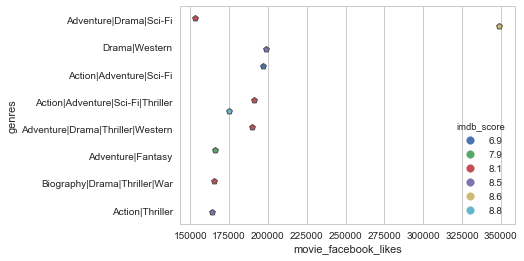

In [274]:
stripplot(top_fb_likes,"movie_facebook_likes", "genres","imdb_score")

In [277]:
# Top movie based on gross. 
top_gross = movie.top_rated("movie_title", "gross", "imdb_score","genres").head(10)

top_gross

,gross,imdb_score,genres
movie_title,,,
Avatar,760505847.0,7.9,Action|Adventure|Fantasy|Sci-Fi
Titanic,658672302.0,7.7,Drama|Romance
Jurassic World,652177271.0,7.0,Action|Adventure|Sci-Fi|Thriller
The Avengers,623279547.0,8.1,Action|Adventure|Sci-Fi
The Dark Knight,533316061.0,9.0,Action|Crime|Drama|Thriller
Star Wars: Episode I - The Phantom Menace,474544677.0,6.5,Action|Adventure|Fantasy|Sci-Fi
Star Wars: Episode IV - A New Hope,460935665.0,8.7,Action|Adventure|Fantasy|Sci-Fi
Avengers: Age of Ultron,458991599.0,7.5,Action|Adventure|Sci-Fi
The Dark Knight Rises,448130642.0,8.5,Action|Thriller


In [285]:
#Top 10 Genres! based on Imdb score
top_genre = movie.top_10("genres", "imdb_score")

(<matplotlib.axes._subplots.AxesSubplot at 0x17d3d390>,
 <matplotlib.text.Text at 0x17dfa198>)

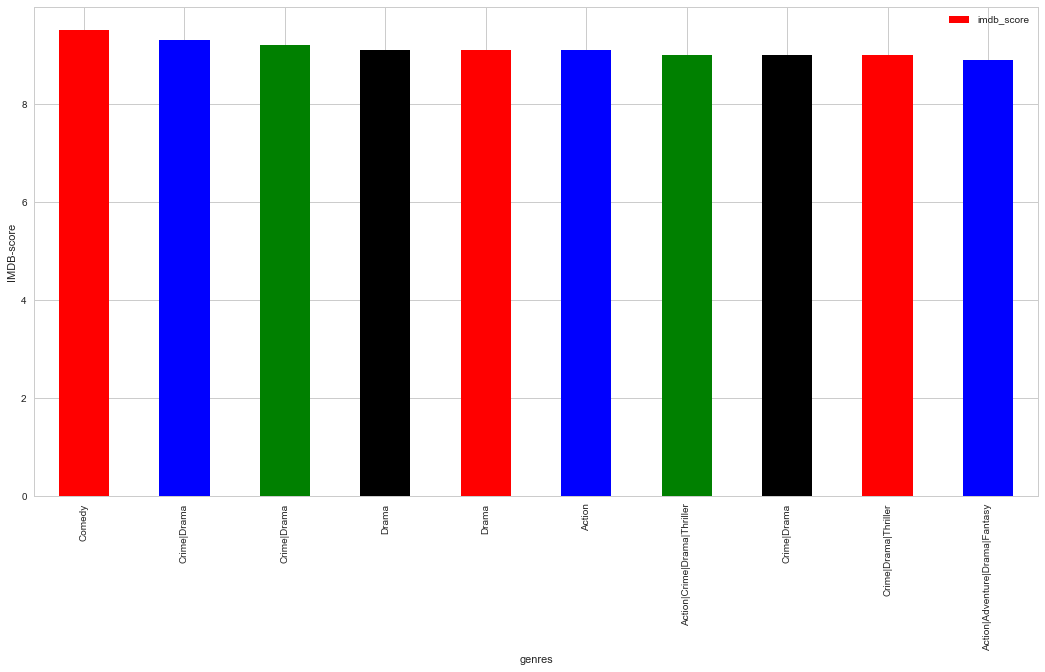

In [289]:
barplot_col(top_genre, "genres","imdb_score" ,"genres","IMDB-score")

In [215]:
top_imdb = movie_df.sort_values('imdb_score', ascending = False)
# language', 'country', 'budget',, 'duration'
topi = top_imdb.loc[:,['movie_title', 'imdb_score','title_year','language',  'director_name', 'gross' ]]
# topi.head(20)

#indian top 10 rated movies
ind = topi[topi['language']== 'Hindi']
ind.head(10)

,movie_title,imdb_score,title_year,language,director_name,gross
3870,Airlift,8.5,2016.0,Hindi,Raja Menon,NaN
3685,Rang De Basanti,8.4,2006.0,Hindi,Rakeysh Omprakash Mehra,2197331.0
4160,Lage Raho Munna Bhai,8.2,2006.0,Hindi,Rajkumar Hirani,NaN
3344,My Name Is Khan,8.0,2010.0,Hindi,Karan Johar,4018695.0
3510,Veer-Zaara,7.9,2004.0,Hindi,Yash Chopra,2921738.0
4088,Water,7.8,2005.0,Hindi,Deepa Mehta,3222857.0
1056,Earth,7.8,1998.0,Hindi,Deepa Mehta,528972.0
4385,The Lunchbox,7.8,2013.0,Hindi,Ritesh Batra,4231500.0
4528,Rocket Singh: Salesman of the Year,7.5,2009.0,Hindi,Shimit Amin,NaN
3789,"Gandhi, My Father",7.4,2007.0,Hindi,Feroz Abbas Khan,240425.0


In [60]:
# latest top movies! w.r.t to IMDB score!
movie.last_n("title_year", "imdb_score","movie_title", 10)

,imdb_score,movie_title
title_year,,
2007.0,8.4,[Rec]
2008.0,9.0,Zack and Miri Make a Porno
2009.0,8.3,[Rec] 2
2010.0,8.8,You Will Meet a Tall Dark Stranger
2011.0,8.5,Zookeeper
2012.0,8.5,Zero Dark Thirty
2013.0,8.4,Zulu
2014.0,8.7,Z Storm
2015.0,8.6,Zipper


In [35]:
#Finding Directors total budget and gross. 
director_budget_gross = movie.sum_groupby("director_name", "budget","gross").nlargest(10, 'gross')
director_budget_gross

,budget,gross
director_name,,
Steven Spielberg,1.662901e+09,4.114233e+09
Peter Jackson,1.692000e+09,2.592969e+09
Michael Bay,1.587000e+09,2.231243e+09
Tim Burton,1.247000e+09,2.071275e+09
Sam Raimi,1.430975e+09,2.049549e+09
James Cameron,7.485000e+08,1.948126e+09
Christopher Nolan,1.005000e+09,1.813228e+09
George Lucas,3.547770e+08,1.741418e+09
Joss Whedon,7.300000e+08,1.730887e+09


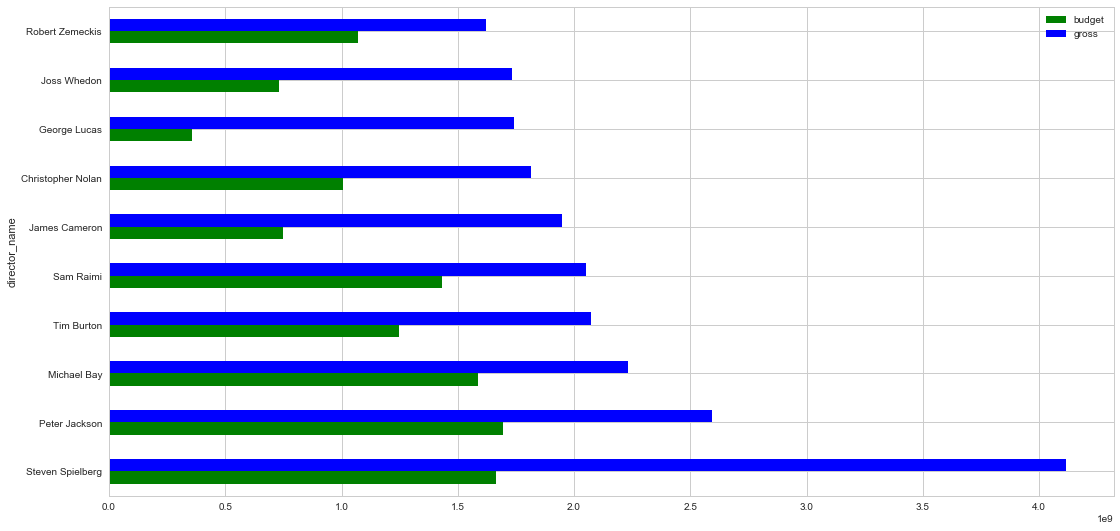

In [241]:
#Plotting a top 10 directors by budget and gross

barhplot(director_budget_gross)

In [33]:
#Finding Return On Investment on Director all time!
dir_roi =movie.roi("director_name", "gross", "budget",10)

In [34]:
dir_roi

director_name
Jonathan Caouette    2715.660550
Daniel Myrick        2342.168567
Travis Cluff          227.578190
William Cottrell       92.462743
Joe Camp               79.105200
Jafar Panahi           67.378000
Shane Carruth          60.680000
Robert Townsend        52.286170
John 'Bud' Cardos      34.000000
Norman Ferguson        32.423077
dtype: float64

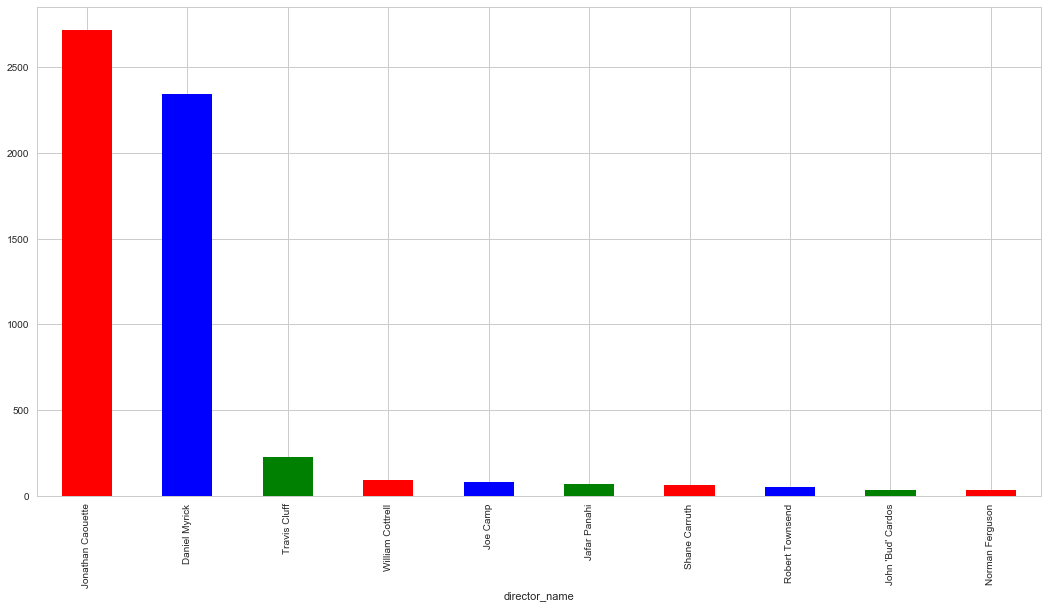

In [123]:
barplot(dir_roi)

In [124]:
#Finding ROI for directors after year >= 2015!

dir_roi_2015 = movie.roiy("director_name","gross","budget",10,"title_year",2015)
dir_roi_2015

director_name
Travis Cluff          227.578190
M. Night Shyamalan     13.013828
David F. Sandberg      11.537962
Rob Cohen               8.846390
Joel Edgerton           8.754258
James DeMonaco          7.884513
David Gelb              7.817892
Robert Eggers           7.182369
Elizabeth Banks         6.325392
Tim Miller              6.259039
dtype: float64

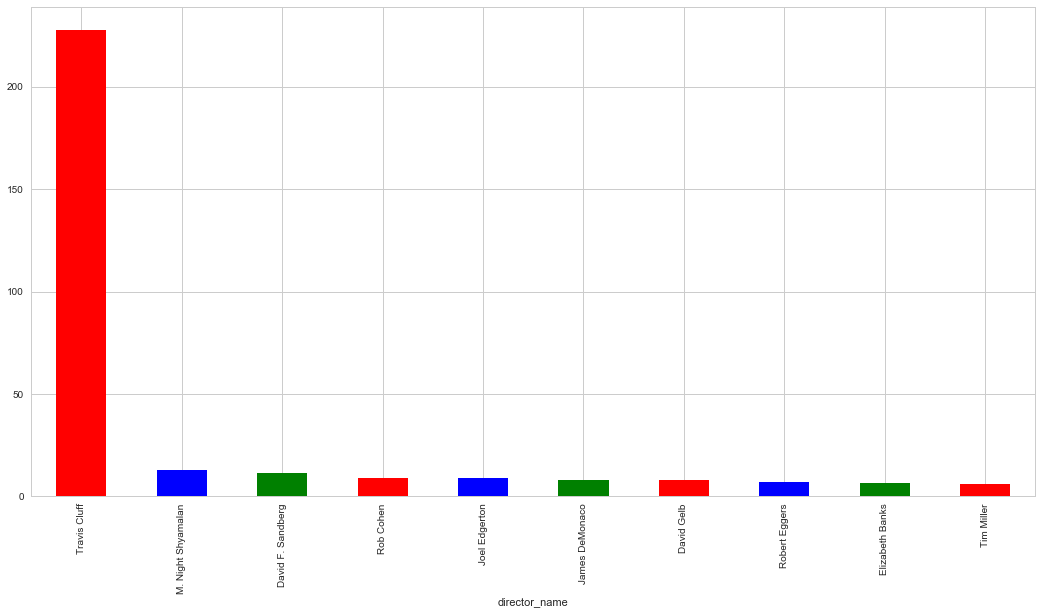

In [125]:
barplot(dir_roi_2015)

In [126]:
#Finding ROI for actors after year >= 2015!
act_roi_2015 = movie.roiy("actor_1_name","gross","budget",10,"title_year",2015)
act_roi_2015

actor_1_name
Pfeifer Brown      227.578190
Ocean James         13.013828
Billy Burke         11.537962
Ryan Guzman          8.846390
Busy Philipps        8.754258
Julian Richings      7.182369
Anna Kendrick        6.325392
Frank Grillo         6.065010
Aldis Hodge          5.751045
Alexa PenaVega       5.645768
dtype: float64

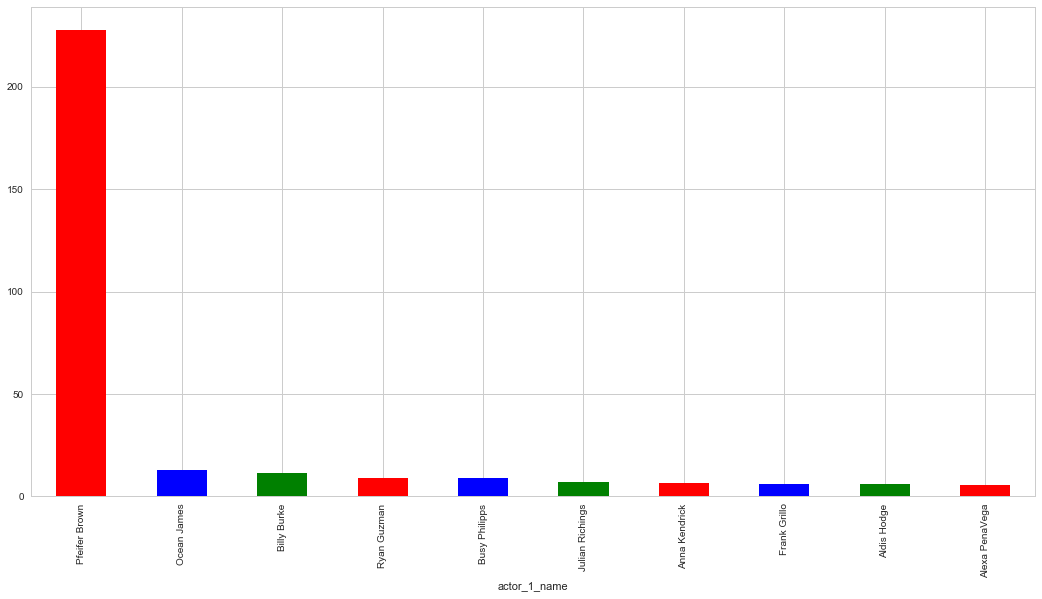

In [127]:
barplot(act_roi_2015)

In [20]:
movie_df['budget'].sum()

180914175606.0

In [57]:
# What is the average IMDB rating by year

avg_imdb = movie.mean_groupby("title_year" ,"imdb_score" , "actor_1_name")
avg_imdb['imdb_score'].sort_values(ascending = False).head(3)


title_year
1957.0    8.55
1925.0    8.30
1927.0    8.30
Name: imdb_score, dtype: float64

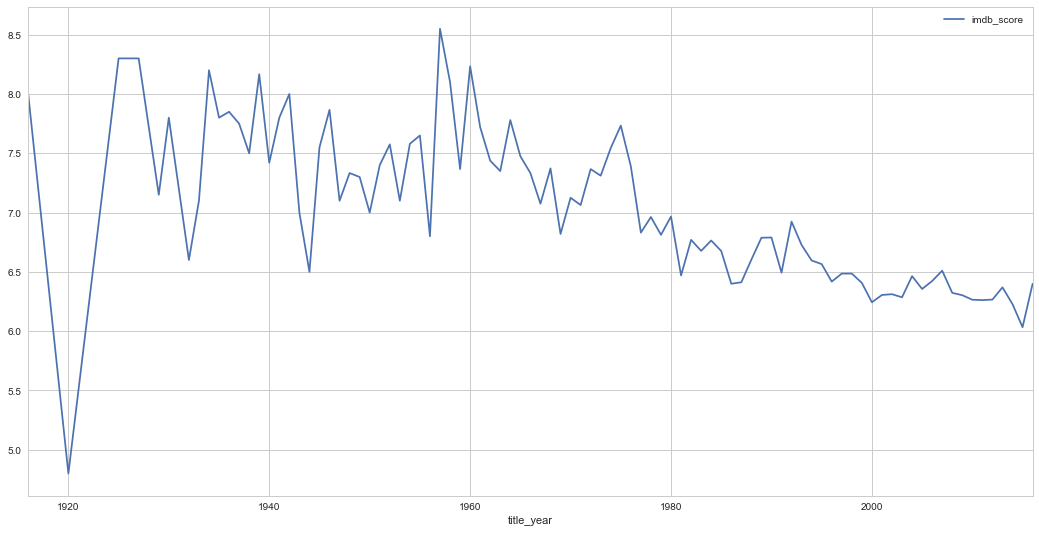

In [52]:
avg_imdb.plot(figsize = (18,9))

#### #The overall trend of average score seems to be declining. The highest average score is achieved by the year 1957. The lowest being achieved in 1920. As years pass by , the trend keeps decreasing.This is a question of quality vs quantity.Average scores seem to be constant in the years 1925 to 1929.

### #How do the average score change for each type of content rating?


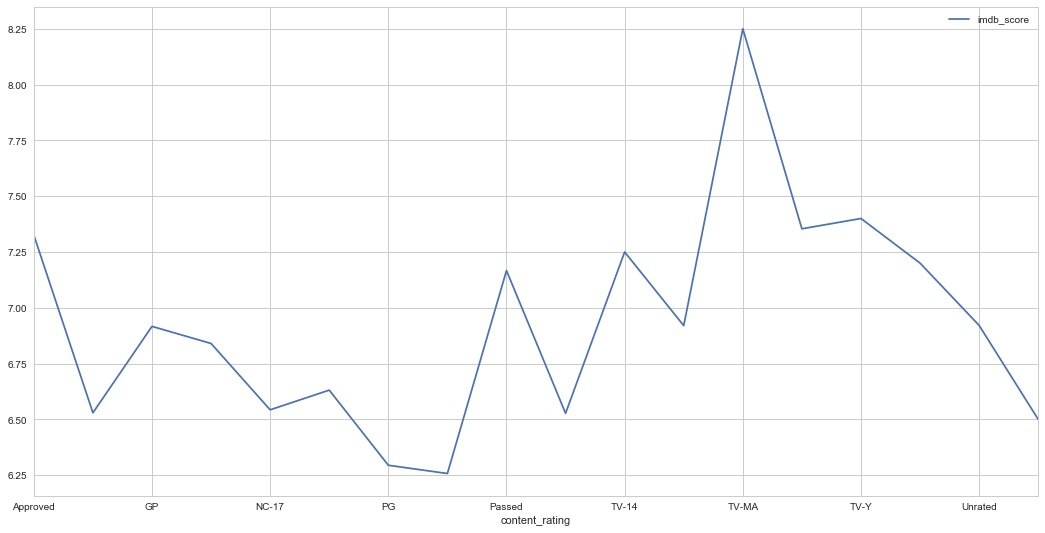

In [50]:


avg_rating = movie.mean_groupby("content_rating" ,"imdb_score" , "actor_1_name")
avg_rating.plot(figsize = (18,9))

#### # We see that the highest average score seems to be bagged by TV-MA category.